### Plot Algo. Comparisons for Gauged Reach
Confluence summit at U Mass, April 2024.

Created: Marissa Hughes \
Affiliation: University of North Carolina at Chapel Hill \
Contact: mjdudek@email.unc.edu \
Purpose: Modified version of Nikki Teboldi's 'example_plot_SWOT_SoS_discharge_gauge' to plot multiple algorithms against a gauged reach 

#### Required libraries

In [ ]:
import netCDF4
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import datetime

#### Import data

In [ ]:
# Open the priors file:
priors = netCDF4.Dataset("/nas/cee-water/cjgleason/marissa/Q_SWOT/SoS_notebooks/na_sword_v16_SOS_priors.nc", format="NETCDF4")

# Open the results file
results = netCDF4.Dataset("/nas/cee-water/cjgleason/marissa/Q_SWOT/SoS_notebooks/na_sword_v16_SOS_results_sic_update.nc", format="NETCDF4")

In [ ]:
# Display the priors groups
print("Priors Groups:")
print(priors.groups)

Priors Groups:
{'reaches': <class 'netCDF4._netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches)
    groups: , 'nodes': <class 'netCDF4._netCDF4.Group'>
group /nodes:
    dimensions(sizes): 
    variables(dimensions): int64 node_id(num_nodes), int64 reach_id(num_nodes), float64 x(num_nodes), float64 y(num_nodes), <class 'str'> river_name(num_nodes)
    groups: , 'model': <class 'netCDF4._netCDF4.Group'>
group /model:
    dimensions(sizes): num_months(12), probability(20)
    variables(dimensions): int32 num_months(num_months), int32 probability(probability), float64 flow_duration_q(num_reaches, probability), float64 max_q(num_reaches), float64 monthly_q(num_reaches, num_months), float64 mean_q(num_reaches), float64 min_q(num_reaches), float64 two_year_return_q(num_reaches), int32 area_estimate_flag(num_reaches)
    groups: , 'gbpriors': <class

In [ ]:
# Display the module groups
print("Results Groups:")
print(results.groups)

Results Groups:
{'reaches': <class 'netCDF4._netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches), int32 observations(num_reaches), float64 time(num_reaches)
    groups: , 'nodes': <class 'netCDF4._netCDF4.Group'>
group /nodes:
    dimensions(sizes): 
    variables(dimensions): int64 node_id(num_nodes), int64 reach_id(num_nodes), float64 x(num_nodes), float64 y(num_nodes), <class 'str'> river_name(num_nodes), int32 observations(num_nodes), float64 time(num_nodes)
    groups: , 'prediagnostics': <class 'netCDF4._netCDF4.Group'>
group /prediagnostics:
    dimensions(sizes): 
    variables(dimensions): 
    groups: reach, node, 'momma': <class 'netCDF4._netCDF4.Group'>
group /momma:
    dimensions(sizes): 
    variables(dimensions): float64 stage(num_reaches), float64 width(num_reaches), float64 slope(num_reaches), float64 Qgage(num_reaches), flo

#### Overlapping algo. reaches for SSAD, MOMMA, HiVDI (as of 20240429)

In [22]:
RIDS=results['reaches']['reach_id'][:].filled(np.nan)
sad=[74261000041, 74265000021, 74266300131, 74266300071, 74266700101,
       74266400031, 74266700051, 74266700141, 74266700201, 74266700171,
       74266400071, 74266400161, 74266700261, 74266400251, 74266800021,
       74266800071, 74266800031, 74266800131, 74267300111, 74266800151,
       74266400511, 74266900041, 74266900131, 74266400451, 74266400451,
       74266400451, 74266900081, 74266400671, 74266400591, 74266900151,
       74266400711, 74266400711, 74266900301, 74266900211, 74266400751,
       74266900491, 74266900511, 74265000121, 74267200031, 74267200121,
       74267200171, 74267200281, 74267300181, 74267300191, 74264700381,
       74267500041, 74267400131, 74267700141, 74264900071, 74269900761,
       74262700531, 74262700551, 74262800311, 74262800351, 74262800371,
       74267600061, 74267600091, 74267600101, 74267600121, 74267600221,
       74267600201, 74267600151, 74267600241, 74267800251, 74267800341,
       74267800201, 74267800051, 74267800151, 74267800141, 74267800091,
       74267800121, 74267800071, 74269400291, 74269400181, 74269400201,
       74269400041, 74269400331, 74269500051, 74269600111, 74269600101,
       74269600061, 74269600051, 74269700031, 74269900551, 74269800211,
       74269800111, 74269900431, 74269800051, 74269900071, 74269900191,
       74269900331, 74269900131, 74269900231, 74269900481, 74269900351,
       74269900271, 74269900811, 74269900521, 74269900701, 74262200241,
       74262200201, 74262200031, 74262200091, 74262200131, 74262200161,
       74264300091, 74262200271, 74262301081, 74262200321, 74262200361,
       74264300121, 74264400101, 74264600021, 74264600291, 74262800181,
       74262800281, 74262800251, 74268900281, 74268300081, 74268400011,
       74269200061, 74268400041, 74268500061, 74268600011, 74268700061,
       74268800021, 74268800051, 74269800381, 74268800131, 74269800481,
       74269800391]
#momma
momma=[74265000121,74266400251,74266400591,74266700141,74266800021,74266800131,74266800151,74267300181,74267600101,74267600151,74267600201
,74267800071,74267800091,74267800121,74267800141,74267800151,74268600011,74268800021
,74268900281,74269400331,74269600051,74269800051,74269800381,74269900271,74269900431,74269900701]

#hivdi
hivdi=[74261000041,74262200091,74262200131
,74262200161,74262200201,74262200271,74262200361
,74262301081,74262800281,74262800311,74262800351
,74264300091,74264300121,74264600021,74264600291
,74264700381,74265000021,74265000121,74266300071
,74266300131,74266400031,74266400251,74266400511
,74266400591,74266700051,74266700101,74266700141
,74266700171,74266700201,74266800031,74266900151
,74266900491,74266900511,74267300191,74267400131
,74267600061,74269600061]
    
reach_int = np.intersect1d(sad, hivdi)
reach_num = np.intersect1d(reach_int, momma)
print(reach_num)

[74265000121 74266400251 74266400591 74266700141]


#### Find reaches with overlapping gauges

In [ ]:
# Locate overlapping reach identifier
reach_ids = results['reaches']['reach_id'][:]
matches = np.isin(reach_ids, reach_num)
riv_indexes = np.where(matches)

riv_reach = results["reaches"]["reach_id"][riv_indexes]
print("River reach identifiers:")
print(riv_reach)

gauge_reach = priors["USGS"]["USGS_reach_id"][:]
print("Gauge reach identifiers:")
print(gauge_reach)

reach_overlap = np.intersect1d(gauge_reach, riv_reach)
print("Overlapping reaches:")
print(reach_overlap)

River reach identifiers:
[74265000121 74266400251 74266400591 74266700141]
Gauge reach identifiers:
[73282400081 73282100081 73282300331 ... 74298200361 74294900381
 74294700251]
Overlapping reaches:
[74265000121 74266400251 74266400591 74266700141]


#### Select a reach

In [20]:
# Select a reach
reach_id = 74269900481
print(f"Reach id selected: {reach_id}")

# Select the first reach
# reach_id = reach_overlap[0]
# print(f"Reach id selected: {reach_id}")

Reach id selected: 74269900481


#### Define data and plot

Number of gauge discharge values: 15090.
Number of HivDI discharge values: 0.
Number of HivDI obs values: 0.
Number of MOMMA discharge values: 0.
Number of Sic4DVAR discharge values: 8.
Number of SAD discharge values: 8.
Number of SADs obs values: 8.
Number of integrator HivDI discharge values: 8.
Number of integrator MOMMA discharge values: 8.
Number of integrator SiC4DVAR discharge values: 8.
Number of integrator SAD discharge values: 8.
Days of observation overlap:
['20240127', '20240129', '20240207', '20240309', '20240310', '20240330', '20240331', '20240410']
Gauge time:
 ['20240127' '20240129' '20240207' '20240309' '20240310' '20240330'
 '20240331' '20240410']
Gauge discharge:
 [379.44512  557.84096  317.14816  184.342368 232.480928 130.540448
 130.25728  455.90048 ]
HiVDI time:
 []
HiVDI discharge:
 []
MOMMA time:
 []
MOMMA discharge:
 []
SiC4DVAR time:
 ['20240127' '20240129' '20240207' '20240309' '20240310' '20240330'
 '20240331' '20240410']
SiC4DVAR discharge:
 [253.24920867 4

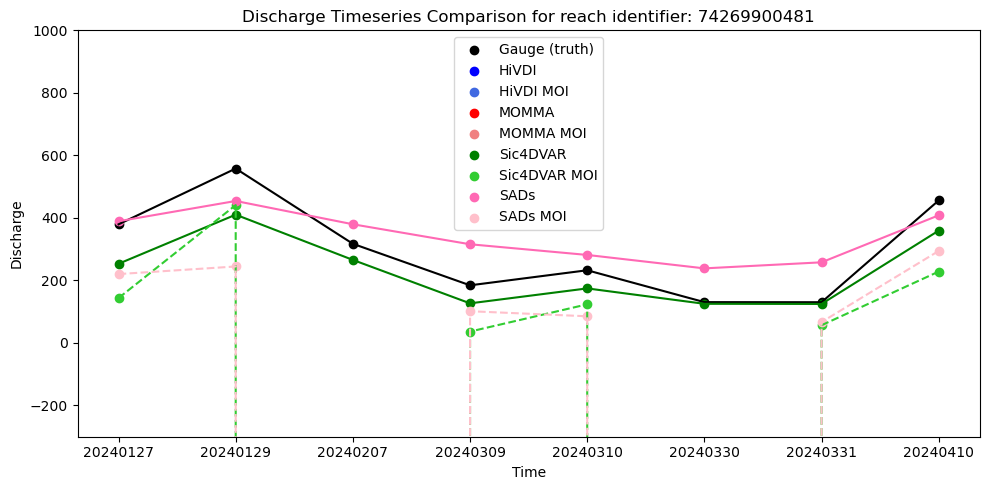

In [21]:
# Get reach index for gauge data
reach_gauge_index = np.where(gauge_reach == reach_id)

# Get discharge and filter out missing values
missing = priors["USGS"]["USGS_q"]._FillValue
gauge_discharge = priors["USGS"]["USGS_q"][reach_gauge_index].filled()[0]
nonmissing_indexes_g = np.where(gauge_discharge != missing)
gauge_discharge = gauge_discharge[nonmissing_indexes_g]
print(f"Number of gauge discharge values: {len(gauge_discharge)}.")

# Get time and filter out missing values
gauge_time = priors["USGS"]["USGS_qt"][reach_gauge_index].filled().astype(int)[0]
gauge_time = gauge_time[nonmissing_indexes_g]

# Convert time from ordinal value
gauge_time = [ datetime.datetime.fromordinal(gt).strftime("%Y%m%d") for gt in gauge_time ]

# ---- HiVDI

# Locate the reach identifier and associated HiVDI discharge time series
reach_q_index = np.where(results['reaches']['reach_id'][:] == reach_id)
hivdi_discharge = results['hivdi']['Q'][reach_q_index][0]

# Filter out missing values
missing = results['hivdi']['Q'].missing_value
nonmissing_indexes_h = np.where(hivdi_discharge != missing)
hivdi_discharge = hivdi_discharge[nonmissing_indexes_h]
print(f"Number of HivDI discharge values: {len(hivdi_discharge)}.")

# Retrieve SWOT observation times and filter out missing values
hivdi_time = results['reaches']['time'][reach_q_index][0]
hivdi_time = hivdi_time[nonmissing_indexes_h]
print(f"Number of HivDI obs values: {len(hivdi_time)}.")

# Convert to HiVDI time to same format as gauge agency time
swot_ts = datetime.datetime(2000,1,1,0,0,0)   # SWOT timestamp delta
hivdi_time = [ (swot_ts + datetime.timedelta(seconds=st)).strftime("%Y%m%d") for st in hivdi_time ]

# ---- MOMMA

# Locate the reach identifier and associated HiVDI discharge time series
reach_q_index = np.where(results['reaches']['reach_id'][:] == reach_id)
momma_discharge = results['momma']['Q'][reach_q_index][0]

# Filter out missing values
missing = results['momma']['Q'].missing_value
nonmissing_indexes_h = np.where(momma_discharge != missing)
momma_discharge = momma_discharge[nonmissing_indexes_h]
print(f"Number of MOMMA discharge values: {len(momma_discharge)}.")

# Retrieve SWOT observation times and filter out missing values
momma_time = results['reaches']['time'][reach_q_index][0]
momma_time = momma_time[nonmissing_indexes_h]

# Convert to HiVDI time to same format as gauge agency time
swot_ts = datetime.datetime(2000,1,1,0,0,0)   # SWOT timestamp delta
momma_time = [ (swot_ts + datetime.timedelta(seconds=st)).strftime("%Y%m%d") for st in momma_time ]

# ---- Si4DVAR

# Locate the reach identifier and associated HiVDI discharge time series
reach_q_index = np.where(results['reaches']['reach_id'][:] == reach_id)
sic_discharge = results['sic4dvar']['Q_da'][reach_q_index][0]

# Filter out missing values
missing = results['sic4dvar']['Q_da'].missing_value
nonmissing_indexes_h = np.where(sic_discharge != missing)
sic_discharge = sic_discharge[nonmissing_indexes_h]
print(f"Number of Sic4DVAR discharge values: {len(sic_discharge)}.")

# Retrieve SWOT observation times and filter out missing values
sic_time = results['reaches']['time'][reach_q_index][0]
sic_time = sic_time[nonmissing_indexes_h]

# Convert to HiVDI time to same format as gauge agency time
swot_ts = datetime.datetime(2000,1,1,0,0,0)   # SWOT timestamp delta
sic_time = [ (swot_ts + datetime.timedelta(seconds=st)).strftime("%Y%m%d") for st in sic_time ]

# # ---- SAD

# Locate the reach identifier and associated HiVDI discharge time series
reach_q_index = np.where(results['reaches']['reach_id'][:] == reach_id)
sad_discharge = results['sad']['Qa'][reach_q_index][0]

# Filter out missing values
missing = results['sad']['Qa'].missing_value
nonmissing_indexes_h = np.where(sad_discharge != missing)
sad_discharge = sad_discharge[nonmissing_indexes_h]
print(f"Number of SAD discharge values: {len(sad_discharge)}.")

# Retrieve SWOT observation times and filter out missing values
sad_time = results['reaches']['time'][reach_q_index][0]
sad_time = sad_time[nonmissing_indexes_h]
print(f"Number of SADs obs values: {len(sad_time)}.")

# Convert to HiVDI time to same format as gauge agency time
swot_ts = datetime.datetime(2000,1,1,0,0,0)   # SWOT timestamp delta
sad_time = [ (swot_ts + datetime.timedelta(seconds=st)).strftime("%Y%m%d") for st in sad_time ]

# --- MOI

# Locate MOI discharge results for HiVDI making sure to filter out missing values
moi_hivdi_q = results["moi"]["hivdi"]["q"][reach_q_index][0]
moi_hivdi_q = moi_hivdi_q[nonmissing_indexes_h]
print(f"Number of integrator HivDI discharge values: {len(moi_hivdi_q)}.")

# Locate MOI discharge results for HiVDI making sure to filter out missing values
moi_momma_q = results["moi"]["momma"]["q"][reach_q_index][0]
moi_momma_q = moi_momma_q[nonmissing_indexes_h]
print(f"Number of integrator MOMMA discharge values: {len(moi_momma_q)}.")

# Locate MOI discharge results for HiVDI making sure to filter out missing values
moi_sic_q = results["moi"]["sic4dvar"]["q"][reach_q_index][0]
moi_sic_q = moi_momma_q[nonmissing_indexes_h]
print(f"Number of integrator SiC4DVAR discharge values: {len(moi_sic_q)}.")

# Locate MOI discharge results for HiVDI making sure to filter out missing values
moi_sad_q = results["moi"]["sad"]["q"][reach_q_index][0]
moi_sad_q = moi_sad_q[nonmissing_indexes_h]
print(f"Number of integrator SAD discharge values: {len(moi_sad_q)}.")

# ---- PRINT

# Find overlapping time between in situ and SWOT observations
obs_overlap = list(set(sad_time).intersection(set(gauge_time)))
obs_overlap.sort()
print("Days of observation overlap:")
print(obs_overlap)

# Get indexes of overlap for gauge, algorithm and integrator
gauge_overlap_index = np.where(np.in1d(gauge_time, obs_overlap))[0]
hivdi_overlap_index = np.where(np.in1d(hivdi_time, obs_overlap))[0]
momma_overlap_index = np.where(np.in1d(momma_time, obs_overlap))[0]
sic_overlap_index = np.where(np.in1d(sic_time, obs_overlap))[0]
sad_overlap_index = np.where(np.in1d(sad_time, obs_overlap))[0]

# Retrieve time and discharge values for indexes
gauge_time = np.array(gauge_time)[gauge_overlap_index]
gauge_discharge = np.array(gauge_discharge)[gauge_overlap_index]
print("Gauge time:\n", gauge_time)
print("Gauge discharge:\n", gauge_discharge)

hivdi_time = np.array(hivdi_time)[hivdi_overlap_index]
hivdi_discharge = np.array(hivdi_discharge)[hivdi_overlap_index]
print("HiVDI time:\n", hivdi_time)
print("HiVDI discharge:\n", hivdi_discharge)

momma_time = np.array(momma_time)[momma_overlap_index]
momma_discharge = np.array(momma_discharge)[momma_overlap_index]
print("MOMMA time:\n", momma_time)
print("MOMMA discharge:\n", momma_discharge)

sic_time = np.array(sic_time)[sic_overlap_index]
sic_discharge = np.array(sic_discharge)[sic_overlap_index]
print("SiC4DVAR time:\n", sic_time)
print("SiC4DVAR discharge:\n", sic_discharge)

sad_time = np.array(sad_time)[sad_overlap_index]
sad_discharge = np.array(sad_discharge)[sad_overlap_index]
print("SADs time:\n", sad_time)
print("SADs discharge:\n", sad_discharge)

moi_hivdi_q = np.array(moi_hivdi_q)[hivdi_overlap_index]
moi_momma_q = np.array(moi_momma_q)[momma_overlap_index]
moi_sic_q = np.array(moi_sic_q)[sic_overlap_index]
moi_sad_q = np.array(moi_sad_q)[sad_overlap_index]
print("HiVDI MOI discharge:\n", moi_hivdi_q)
print("MOMMA MOI discharge:\n", moi_momma_q)
print("Sic4DVAR MOI discharge:\n", moi_sic_q)
print("SADs MOI discharge:\n", moi_sad_q)

# ---- PLOT

import matplotlib.pyplot as plt

# Create a figure and a single axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot Gauge discharge
ax.scatter(gauge_time, gauge_discharge, color='black', label='Gauge (truth)')
ax.plot(gauge_time, gauge_discharge, color='black')

# Plot HiVDI discharge
ax.scatter(hivdi_time, hivdi_discharge, color='blue', label='HiVDI')
ax.plot(hivdi_time, hivdi_discharge, color='blue')
# Plot MOI discharge
ax.scatter(hivdi_time, moi_hivdi_q, color='royalblue', label='HiVDI MOI')
ax.plot(hivdi_time, moi_hivdi_q, color='royalblue', linestyle='--')

# Plot momma discharge
ax.scatter(momma_time, momma_discharge, color='red', label='MOMMA')
ax.plot(momma_time, momma_discharge, color='red')
# Plot MOI discharge
ax.scatter(momma_time, moi_momma_q, color='lightcoral', label='MOMMA MOI')
ax.plot(momma_time, moi_momma_q, color='lightcoral', linestyle='--')

# Plot sic4dvar discharge
ax.scatter(sic_time, sic_discharge, color='green', label='Sic4DVAR')
ax.plot(sic_time, sic_discharge, color='green')
# Plot MOI discharge
ax.scatter(sic_time, moi_sic_q, color='limegreen', label='Sic4DVAR MOI')
ax.plot(sic_time, moi_sic_q, color='limegreen', linestyle='--')

# Plot SAD discharge
ax.scatter(sad_time, sad_discharge, color='hotpink', label='SADs')
ax.plot(sad_time, sad_discharge, color='hotpink')
# Plot SAD MOI discharge
ax.scatter(sad_time, moi_sad_q, color='pink', label='SADs MOI')
ax.plot(sad_time, moi_sad_q, color='pink', linestyle='--')

# Set labels and title
ax.set_ylabel('Discharge')
ax.set_ylim([-300, 1000])
ax.set_xlabel('Time')
ax.set_title(f"Discharge Timeseries Comparison for reach identifier: {reach_id}")

# Improve layout and show plot
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Example list of reach IDs to process
reach_ids = [74269900481, 74269900482, 74269900483]  # Add more IDs as needed

for reach_id in reach_ids:
    print(f"Reach id selected: {reach_id}")

    # Get reach index for gauge data
    reach_gauge_index = np.where(gauge_reach == reach_id)

    # Process discharge data for gauge
    missing = priors["USGS"]["USGS_q"]._FillValue
    gauge_discharge = priors["USGS"]["USGS_q"][reach_gauge_index].filled()[0]
    nonmissing_indexes_g = np.where(gauge_discharge != missing)
    gauge_discharge = gauge_discharge[nonmissing_indexes_g]
    print(f"Number of gauge discharge values: {len(gauge_discharge)}.")

    # Process time data for gauge
    gauge_time = priors["USGS"]["USGS_qt"][reach_gauge_index].filled().astype(int)[0]
    gauge_time = gauge_time[nonmissing_indexes_g]
    gauge_time = [datetime.datetime.fromordinal(gt).strftime("%Y%m%d") for gt in gauge_time]

    # Repeat the processing for HiVDI, MOMMA, Si4DVAR, SAD as done in your script
    # I will not repeat the full details here to keep this example concise

    # Example process for HiVDI
    reach_q_index = np.where(results['reaches']['reach_id'][:] == reach_id)
    hivdi_discharge = results['hivdi']['Q'][reach_q_index][0]
    missing = results['hivdi']['Q'].missing_value
    nonmissing_indexes_h = np.where(hivdi_discharge != missing)
    hivdi_discharge = hivdi_discharge[nonmissing_indexes_h]
    hivdi_time = results['reaches']['time'][reach_q_index][0]
    hivdi_time = hivdi_time[nonmissing_indexes_h]
    hivdi_time = [ (datetime.datetime(2000,1,1,0,0,0) + datetime.timedelta(seconds=st)).strftime("%Y%m%d") for st in hivdi_time ]
    print(f"Number of HivDI discharge values: {len(hivdi_discharge)}.")

    # Create a figure and a single axes for this specific reach ID
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(gauge_time, gauge_discharge, color='black', label='Gauge (truth)')
    ax.plot(gauge_time, gauge_discharge, color='black')
    ax.scatter(hivdi_time, hivdi_discharge, color='blue', label='HiVDI')
    ax.plot(hivdi_time, hivdi_discharge, color='blue')

    # More plotting logic can be added here for other datasets

    # Set labels, title, and legend for the plot
    ax.set_ylabel('Discharge')
    ax.set_ylim([-300, 1000])
    ax.set_xlabel('Time')
    ax.set_title(f"Discharge Timeseries Comparison for reach identifier: {reach_id}")
    ax.legend()
    plt.tight_layout()
    plt.show()
